In [1]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures

#Ordinary Least Squared function
def ols(x, y, z, degree = 5):
    #x: vector of size(n, 1)
    #y: vector of size(n,1)
    # z: vector of size(n,1)
    xyb_ = np.c_[x, y]
    poly = PolynomialFeatures(degree)
    xyb = poly.fit_transform(xyb_)
    beta = np.linalg.inv(xyb.T.dot(xyb)).dot(xyb.T).dot(z)

    return beta

In [2]:
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

def FrankeFunction(x,y, noise=0.01):
    term1 = 0.75*np.exp(-(0.25*(9*x-2)**2) - 0.25*((9*y-2)**2))
    term2 = 0.75*np.exp(-((9*x+1)**2)/49.0 - 0.1*(9*y+1))
    term3 = 0.5*np.exp(-(9*x-7)**2/4.0 - 0.25*((9*y-3)**2))
    term4 = -0.2*np.exp(-(9*x-4)**2 - (9*y-7)**2)
    return (term1 + term2 + term3 + term4 + noise*np.random.randn(len(x)))
def R2(zReal, zPredicted):
    """
    :param zReal: actual z-values, size (n, 1)
    :param zPredicted: predicted z-values, size (n, 1)
    :return: R2-score
    """
    meanValue = np.mean(zReal)
    numerator = np.sum((zReal - zPredicted)**2)
    denominator = np.sum((zReal - meanValue)**2)
    result = 1 - (numerator/denominator)
    return result

def MeanSquaredError(z, z_hat):
    """
    :param z: actual z-values, size (n, 1)
    :param z_hat: predicted z-values, size (n, 1)
    :return: Mean squared error
    """
    MSE = np.sum((z - z_hat)**2)/len(z)
    return MSE

In [3]:
import numpy as np
# Load random data, 1000 points
X = np.load('data.npy')


In [4]:
X

array([[0.02772629, 0.81403567],
       [0.81681013, 0.69636746],
       [0.89099811, 0.23927947],
       ...,
       [0.49410465, 0.21646033],
       [0.92647892, 0.21151669],
       [0.31642027, 0.10905259]])

In [5]:
X.shape

(1000, 2)

In [6]:
#shufle dataset
split_dataset = np.array_split(X,5)


In [7]:
for item in split_dataset:
    print(len(item))

200
200
200
200
200


In [12]:
Z_predict = []
MSEs = []
R2Scores = []

for i in range(5):
    test = split_dataset[i]
    train_index = [index for index in range(5) if index != i]
    args = []
    for index in train_index:
        args.append(split_dataset[index])
    train = np.concatenate(args)

    #split x_train, x_test, y_train, y_test
    x_train = train[:, 0]
    y_train = train[:, 1]
    x_test = test[:, 0]
    y_test = test[:, 1]
    
    z_train = FrankeFunction(x_train, y_train)
    z_test = FrankeFunction(x_test, y_test)
    beta = []
    beta = ols(x_train, y_train, z_train, degree=5)
    
    #fit model
    M_ = np.c_[x_test, y_test]
    poly = PolynomialFeatures(5)
    M = poly.fit_transform(M_)
    z_hat = M.dot(beta)  
    
    z_predict= M.dot(beta)
    MSE = MeanSquaredError(z_test, z_predict)
    R2score = R2(z_test, z_predict)
    MSEs.append(MSE)
    R2Scores.append(R2score)
    Z_predict.append(z_hat)
   
    #print(np.mean(z_predict))
 
  

# Calculate MSE, Bias and Variance
#print(Z_predict)
MSE_M = np.mean(MSEs)
R2_M = np.mean(R2Scores)
variance = np.mean(np.var(Z_predict, axis=0, keepdims=True))
bias = np.mean((z_test - np.mean(Z_predict, axis=0, keepdims=True))**2)


In [13]:
MSE_M, R2_M, bias, variance

(0.002101857916780113,
 0.9716233641002733,
 0.05476816657627406,
 0.05927167580686138)

In [65]:
x = X[:, 0]
y = X[:, 1]

0
1
2
3
4


In [52]:
def k_fold(dataset, k):
    # Shuffle dataset: 
    np.random.shuffle(dataset)
    split_dataset = np.array_split(dataset,k)
    Z_predict = []
    MSEs = []
    R2Scores = []
    b = []

    for i in range(k):
        test = split_dataset[i]
        train_index = [index for index in range(k) if index != i]
        args = []
        for index in train_index:
            args.append(split_dataset[index])
        train = np.concatenate(args)

        #split x_train, x_test, y_train, y_test
        x_train = train[:, 0]
        y_train = train[:, 1]
        x_test = test[:, 0]
        y_test = test[:, 1]

        z_train = FrankeFunction(x_train, y_train)
        z_test = FrankeFunction(x_test, y_test)
        beta = []
        beta = ols(x_train, y_train, z_train, degree=5)

        #fit model
        M_ = np.c_[x_test, y_test]
        poly = PolynomialFeatures(5)
        M = poly.fit_transform(M_)
        z_hat = M.dot(beta) 

        z_predict= M.dot(beta)
        print(len(z_hat), len(z_predict))
        MSE = MeanSquaredError(z_test, z_predict)
        R2score = R2(z_test, z_predict)
        MSEs.append(MSE)
        R2Scores.append(R2score)
        Z_predict.append(z_hat)

        b.append(np.mean((z_test - np.mean(Z_predict, axis=0, keepdims=True))**2))



    # Calculate MSE, Bias and Variance
    #print(len(Z_predict))
   # print(len(MSEs))
   # print(len(R2Scores))
    
    MSE_M = np.mean(MSEs)
    R2_M = np.mean(R2Scores)
    variance = np.mean(np.var(Z_predict, axis=0, keepdims=True))
    bias = np.mean(b)

    return MSE_M, R2_M, variance, bias

In [55]:
k_fold(X,5)

200 200
200 200
200 200
200 200
200 200


(0.002398067315602358,
 0.9673948226786822,
 0.05772397109504631,
 0.04068078957957387)

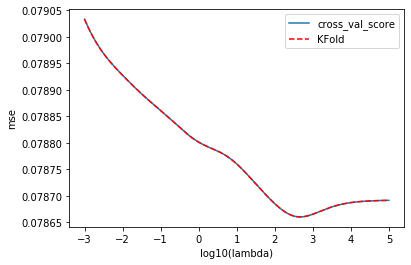

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import PolynomialFeatures

# A seed just to ensure that the random numbers are the same for every run.
# Useful for eventual debugging.
np.random.seed(3155)

# Generate the data.
X = np.load('data.npy')
x = X[:, 0]
y = X[:, 1]

## Cross-validation on Ridge regression using KFold only

# Decide degree on polynomial to fit
poly = PolynomialFeatures(degree = 6)

# Decide which values of lambda to use
nlambdas = 500
lambdas = np.logspace(-3, 5, nlambdas)

# Initialize a KFold instance
k = 5
kfold = KFold(n_splits = k)

# Perform the cross-validation to estimate MSE
scores_KFold = np.zeros((nlambdas, k))
variance = np.zeros((nlambdas, k))

i = 0
for lmb in lambdas:
    ridge = Ridge(alpha = lmb)
    j = 0
    for train_inds, test_inds in kfold.split(x):
        xtrain = x[train_inds]
        ytrain = y[train_inds]

        xtest = x[test_inds]
        ytest = y[test_inds]

        Xtrain = poly.fit_transform(xtrain[:, np.newaxis])
        ridge.fit(Xtrain, ytrain[:, np.newaxis])

        Xtest = poly.fit_transform(xtest[:, np.newaxis])
        ypred = ridge.predict(Xtest)

        scores_KFold[i,j] = np.sum((ypred - ytest[:, np.newaxis])**2)/np.size(ypred)

        j += 1
    i += 1


estimated_mse_KFold = np.mean(scores_KFold, axis = 1)

## Cross-validation using cross_val_score from sklearn along with KFold

# kfold is an instance initialized above as:
# kfold = KFold(n_splits = k)

estimated_mse_sklearn = np.zeros(nlambdas)
i = 0
for lmb in lambdas:
    ridge = Ridge(alpha = lmb)

    X = poly.fit_transform(x[:, np.newaxis])
    estimated_mse_folds = cross_val_score(ridge, X, y[:, np.newaxis], scoring='neg_mean_squared_error', cv=kfold)

    # cross_val_score return an array containing the estimated negative mse for every fold.
    # we have to the the mean of every array in order to get an estimate of the mse of the model
    estimated_mse_sklearn[i] = np.mean(-estimated_mse_folds)

    i += 1

## Plot and compare the slightly different ways to perform cross-validation

plt.figure()

plt.plot(np.log10(lambdas), estimated_mse_sklearn, label = 'cross_val_score')
plt.plot(np.log10(lambdas), estimated_mse_KFold, 'r--', label = 'KFold')

plt.xlabel('log10(lambda)')
plt.ylabel('mse')

plt.legend()

plt.show()

In [2]:
from sklearn.model_selection import KFold
def k_fold_sk(dataset, k):
    # Shuffle dataset: 
    #np.random.shuffle(dataset)
    split_dataset = KFold(dataset,k)
    Z_predict = []
    MSEs = []
    R2Scores = []
    b = []
    

    for i in range(k):
        test = split_dataset[i]
        train_index = [index for index in range(k) if index != i]
        args = []
        for index in train_index:
            args.append(split_dataset[index])
        train = np.concatenate(args)

        #split x_train, x_test, y_train, y_test
        x_train = train[:, 0]
        y_train = train[:, 1]
        x_test = test[:, 0]
        y_test = test[:, 1]

        z_train = FrankeFunction(x_train, y_train)
        z_test = FrankeFunction(x_test, y_test)
        beta = []
        beta = ols(x_train, y_train, z_train, degree=5)

        #fit model
        M_ = np.c_[x_test, y_test]
        poly = PolynomialFeatures(5)
        M = poly.fit_transform(M_)
        z_hat = M.dot(beta) 

        z_predict= M.dot(beta)
        print(len(z_hat), len(z_predict))
        MSE = MeanSquaredError(z_test, z_predict)
        R2score = R2(z_test, z_predict)
        MSEs.append(MSE)
        R2Scores.append(R2score)
        Z_predict.append(z_hat)

        b.append(np.mean((z_test - np.mean(Z_predict, axis=0, keepdims=True))**2))



    # Calculate MSE, Bias and Variance
    #print(len(Z_predict))
   # print(len(MSEs))
   # print(len(R2Scores))
    
    MSE_M = np.mean(MSEs)
    R2_M = np.mean(R2Scores)
    variance = np.mean(np.var(Z_predict, axis=0, keepdims=True))
    bias = np.mean(b)

    return MSE_M, R2_M, variance, bias

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import PolynomialFeatures

# A seed just to ensure that the random numbers are the same for every run.
# Useful for eventual debugging.
np.random.seed(3155)

# Generate the data.
nsamples = 100
x = np.random.randn(nsamples)
y = 3*x**2 + np.random.randn(nsamples)

## Cross-validation on Ridge regression using KFold only

# Decide degree on polynomial to fit
poly = PolynomialFeatures(degree = 6)

# Decide which values of lambda to use
nlambdas = 500
lambdas = np.logspace(-3, 5, nlambdas)

# Initialize a KFold instance
k = 5
kfold = KFold(n_splits = k)

# Perform the cross-validation to estimate MSE
scores_KFold = np.zeros((nlambdas, k))

i = 0
for lmb in lambdas:
    ridge = Ridge(alpha = lmb)
    j = 0
    for train_inds, test_inds in kfold.split(x):
        xtrain = x[train_inds]
        ytrain = y[train_inds]

        xtest = x[test_inds]
        ytest = y[test_inds]

        Xtrain = poly.fit_transform(xtrain[:, np.newaxis])
        ridge.fit(Xtrain, ytrain[:, np.newaxis])

        Xtest = poly.fit_transform(xtest[:, np.newaxis])
        ypred = ridge.predict(Xtest)

        scores_KFold[i,j] = np.sum((ypred - ytest[:, np.newaxis])**2)/np.size(ypred)

        j += 1
    i += 1


estimated_mse_KFold = np.mean(scores_KFold, axis = 1)

## Cross-validation using cross_val_score from sklearn along with KFold

# kfold is an instance initialized above as:
# kfold = KFold(n_splits = k)

estimated_mse_sklearn = np.zeros(nlambdas)
i = 0
for lmb in lambdas:
    ridge = Ridge(alpha = lmb)

    X = poly.fit_transform(x[:, np.newaxis])
    estimated_mse_folds = cross_val_score(ridge, X, y[:, np.newaxis], scoring='neg_mean_squared_error', cv=kfold)

    # cross_val_score return an array containing the estimated negative mse for every fold.
    # we have to the the mean of every array in order to get an estimate of the mse of the model
    estimated_mse_sklearn[i] = np.mean(-estimated_mse_folds)

    i += 1

## Plot and compare the slightly different ways to perform cross-validation

plt.figure()

plt.plot(np.log10(lambdas), estimated_mse_sklearn, label = 'cross_val_score')
plt.plot(np.log10(lambdas), estimated_mse_KFold, 'r--', label = 'KFold')

plt.xlabel('log10(lambda)')
plt.ylabel('mse')

plt.legend()

plt.show()

In [16]:
z = FrankeFunction(x, y, noise=n)
        beta = []
        beta = ols(x, y, z, degree=d)

        # Generate new test data
        x_test = np.random.rand(200)
        y_test = np.random.rand(200)
        z_test = FrankeFunction(x_test, y_test, noise=n)

        #fit model
        M_ = np.c_[x_test, y_test]
        poly = PolynomialFeatures(d)
        M = poly.fit_transform(M_)

        z_predict= M.dot(beta)
        MSE = MeanSquaredError(z_test, z_predict)
        R2score = R2(z_test, z_predict)
        MSEs.append(MSE)
        R2Scores.append(R2score)

[(3, 4, 5), (1, 2, 3)]

In [136]:
from numpy import *
from numpy.random import randint, randn
from time import time

def jackknife(data, stat):
    n = len(data);t = zeros(n); inds = arange(n); t0 = time()
    ## 'jackknifing' by leaving out an observation for each i                                                                                                                      
    for i in range(n):
        t[i] = stat(delete(data,i) )

    # analysis                                                                                                                                                                     
    print("Runtime: %g sec" % (time()-t0)); print("Jackknife Statistics :")
    print("original           bias      std. error")
    print("%8g %14g %15g" % (stat(data),(n-1)*mean(t)/n, (n*var(t))**.5))

    return t


# Returns mean of data samples                                                                                                                                                     
def stat(data):
    return mean(data)


mu, sigma = 100, 15
datapoints = 10000
x = mu + sigma*random.randn(datapoints)
# jackknife returns the data sample                                                                                                                                                
t = jackknife(x, stat)

Runtime: 0.277511 sec
Jackknife Statistics :
original           bias      std. error
  100.08         100.07        0.148322


Error: 0.013121573975499602
Bias^2: 0.012073649439965807
Var: 0.0010479245355337968
0.013121573975499602 >= 0.012073649439965807 + 0.0010479245355337968 = 0.013121573975499604


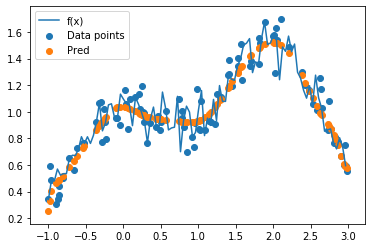

In [139]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.utils import resample

np.random.seed(2018)

n = 500
n_boostraps = 100
degree = 18  # A quite high value, just to show.
noise = 0.1

# Make data set.
x = np.linspace(-1, 3, n).reshape(-1, 1)
y = np.exp(-x**2) + 1.5 * np.exp(-(x-2)**2) + np.random.normal(0, 0.1, x.shape)

# Hold out some test data that is never used in training.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# Combine x transformation and model into one operation.
# Not neccesary, but convenient.
model = make_pipeline(PolynomialFeatures(degree=degree), LinearRegression(fit_intercept=False))

# The following (m x n_bootstraps) matrix holds the column vectors y_pred
# for each bootstrap iteration.
y_pred = np.empty((y_test.shape[0], n_boostraps))
for i in range(n_boostraps):
    x_, y_ = resample(x_train, y_train)

    # Evaluate the new model on the same test data each time.
    y_pred[:, i] = model.fit(x_, y_).predict(x_test).ravel()

# Note: Expectations and variances taken w.r.t. different training
# data sets, hence the axis=1. Subsequent means are taken across the test data
# set in order to obtain a total value, but before this we have error/bias/variance
# calculated per data point in the test set.
# Note 2: The use of keepdims=True is important in the calculation of bias as this 
# maintains the column vector form. Dropping this yields very unexpected results.
error = np.mean( np.mean((y_test - y_pred)**2, axis=1, keepdims=True) )
bias = np.mean( (y_test - np.mean(y_pred, axis=1, keepdims=True))**2 )
variance = np.mean( np.var(y_pred, axis=1, keepdims=True) )
print('Error:', error)
print('Bias^2:', bias)
print('Var:', variance)
print('{} >= {} + {} = {}'.format(error, bias, variance, bias+variance))

plt.plot(x[::5, :], y[::5, :], label='f(x)')
plt.scatter(x_test, y_test, label='Data points')
plt.scatter(x_test, np.mean(y_pred, axis=1), label='Pred')
plt.legend()
plt.show()